# Mr Haulage | Fleet Analysis | Cost Analysis
### Author: Lottie Jane Pollard

*"Without data, you're just another person with an opinion." - W. Edwards Deming*


----------------------------------


<img src="/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/images/logos/techmodal/techmodal_opp_found_logo.png" alt="techmodal_logo" width="350"/>

Income Streams:


<img src="/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/images/table_1_delivery-payments.png" alt="table_1_delivery-payments" width="350"/>


Trucks & Expenditure:


<img src="/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/images/table_2_truck_details.png" alt="table_2_truck_details.png" width="1000"/>


In [1]:
# libraries to import

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import the dataset for 01-03-2022 - 31-03-2023, configure the display & have a look at the dataset
NB: it didn't like the metadata way this time for some reason, it would process up until 13/03/2022 & then stop, so, I've converted datatypes manually

In [2]:
# import the dataset
cost_analysis = pd.read_csv('/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/datasets/mr_haulage_merged_df_for_cost_analysis.csv')

# configure display settings: display all columns regardless of df width, disable wrapping columns to display entire field, no truncating columns, display an English date format
pd.set_option('display.max.columns', None, 'display.width', None, 'display.max.colwidth', None, 'display.date_dayfirst', True, 'display.float_format', '{:.2f}'.format)
# this should update the date format displayed for the whole notebook, but it isn't & I'm not sure why - maybe as I'm in Pycharm IDE note JupyterNotebooks itself

# let's see what we're working with
cost_analysis

,order_date,delivery_region,box_type,box_count,daily_small_trucks_needed,daily_large_trucks_needed
0,2022-03-01,greater_london,large,1,0,1
1,2022-03-01,south_east,small,1,1,0
2,2022-03-01,south_wales,small,1,1,0
3,2022-03-01,south_west,large,1,0,1
4,2022-03-01,south_west,small,1,1,0
...,...,...,...,...,...,...
1179,2023-03-29,south_east,small,1,1,0
1180,2023-03-30,greater_london,small,2,1,0
1181,2023-03-30,south_east,large,1,0,1
1182,2023-03-31,south_west,small,1,1,0


In [3]:
# let's convert 'order_date' to datetime64 & 'delivery_region' & 'box_type' to category

# convert them in to 'category' datatypes
cost_analysis['box_type'] = cost_analysis['box_type'].astype('category')
cost_analysis['delivery_region'] = cost_analysis['delivery_region'].astype('category')

# let's convert 'order_date' to datetime64 datatype
cost_analysis['order_date'] = pd.to_datetime(cost_analysis['order_date'])

# check the new data types
cost_analysis.dtypes

order_date                   datetime64[ns]
delivery_region                    category
box_type                           category
box_count                             int64
daily_small_trucks_needed             int64
daily_large_trucks_needed             int64
dtype: object

### Let's add in some extra columns to allow for financial analysis
let's create 'week_number', 'order_month', 'order_year' & 'order_quarter' columns based on 'order_date' column

In [4]:
# financial week
cost_analysis['order_week'] = cost_analysis['order_date'].dt.isocalendar().week

# financial month
cost_analysis['order_month'] = cost_analysis['order_date'].dt.strftime('%B')

# financial year
cost_analysis['order_year'] = cost_analysis['order_date'].dt.year

# financial quarter (assuming financial year 1st Jan - 31st Dec)
cost_analysis['financial_quarter'] = cost_analysis['order_date'].dt.month.apply(
    lambda x: 'Q1' if 1 <= x <= 3 else 'Q2' if 4 <= x <= 6 else 'Q3' if 7 <= x <= 9 else 'Q4'
)

cost_analysis

,order_date,delivery_region,box_type,box_count,daily_small_trucks_needed,daily_large_trucks_needed,order_week,order_month,order_year,financial_quarter
0,2022-03-01,greater_london,large,1,0,1,9,March,2022,Q1
1,2022-03-01,south_east,small,1,1,0,9,March,2022,Q1
2,2022-03-01,south_wales,small,1,1,0,9,March,2022,Q1
3,2022-03-01,south_west,large,1,0,1,9,March,2022,Q1
4,2022-03-01,south_west,small,1,1,0,9,March,2022,Q1
...,...,...,...,...,...,...,...,...,...,...
1179,2023-03-29,south_east,small,1,1,0,13,March,2023,Q1
1180,2023-03-30,greater_london,small,2,1,0,13,March,2023,Q1
1181,2023-03-30,south_east,large,1,0,1,13,March,2023,Q1
1182,2023-03-31,south_west,small,1,1,0,13,March,2023,Q1


### Let's add in columns to calculate income & expenditure

In [5]:
# revenue
cost_analysis.insert(loc=6, column='revenue', value=[100.00 * count if box == 'large' else 20.00 * count for box, count in zip(cost_analysis['box_type'], cost_analysis['box_count'])])

# driver cost
cost_analysis.insert(loc=7, column='driver_cost', value=[5 * small_trucks + 20 * large_trucks for small_trucks, large_trucks in zip(cost_analysis['daily_small_trucks_needed'], cost_analysis['daily_large_trucks_needed'])])

# fuel cost
cost_analysis.insert(loc=8, column='fuel_cost', value=[5 * small_trucks + 30 * large_trucks for small_trucks, large_trucks in zip(cost_analysis['daily_small_trucks_needed'], cost_analysis['daily_large_trucks_needed'])])

# expenditure
cost_analysis.insert(loc=9, column='expenditure', value=cost_analysis['fuel_cost'] + cost_analysis['driver_cost'])

# profit
cost_analysis.insert(loc=10, column='profit', value=cost_analysis['revenue'] - (cost_analysis['fuel_cost'] + cost_analysis['driver_cost']))

# profit %
cost_analysis.insert(loc=11, column='profit_%', value=(cost_analysis['profit'] / cost_analysis['expenditure']) * 100)

# set the data type for all monetary values to float64 and format to show 2 decimals
monetary_columns = ['revenue', 'fuel_cost', 'driver_cost', 'expenditure', 'profit']
cost_analysis[monetary_columns] = cost_analysis[monetary_columns].astype('float64')
pd.set_option('display.float_format', '{:.2f}'.format)

cost_analysis

,order_date,delivery_region,box_type,box_count,daily_small_trucks_needed,daily_large_trucks_needed,revenue,driver_cost,fuel_cost,expenditure,profit,profit_%,order_week,order_month,order_year,financial_quarter
0,2022-03-01,greater_london,large,1,0,1,100.00,20.00,30.00,50.00,50.00,100.00,9,March,2022,Q1
1,2022-03-01,south_east,small,1,1,0,20.00,5.00,5.00,10.00,10.00,100.00,9,March,2022,Q1
2,2022-03-01,south_wales,small,1,1,0,20.00,5.00,5.00,10.00,10.00,100.00,9,March,2022,Q1
3,2022-03-01,south_west,large,1,0,1,100.00,20.00,30.00,50.00,50.00,100.00,9,March,2022,Q1
4,2022-03-01,south_west,small,1,1,0,20.00,5.00,5.00,10.00,10.00,100.00,9,March,2022,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,2023-03-29,south_east,small,1,1,0,20.00,5.00,5.00,10.00,10.00,100.00,13,March,2023,Q1
1180,2023-03-30,greater_london,small,2,1,0,40.00,5.00,5.00,10.00,30.00,300.00,13,March,2023,Q1
1181,2023-03-30,south_east,large,1,0,1,100.00,20.00,30.00,50.00,50.00,100.00,13,March,2023,Q1
1182,2023-03-31,south_west,small,1,1,0,20.00,5.00,5.00,10.00,10.00,100.00,13,March,2023,Q1


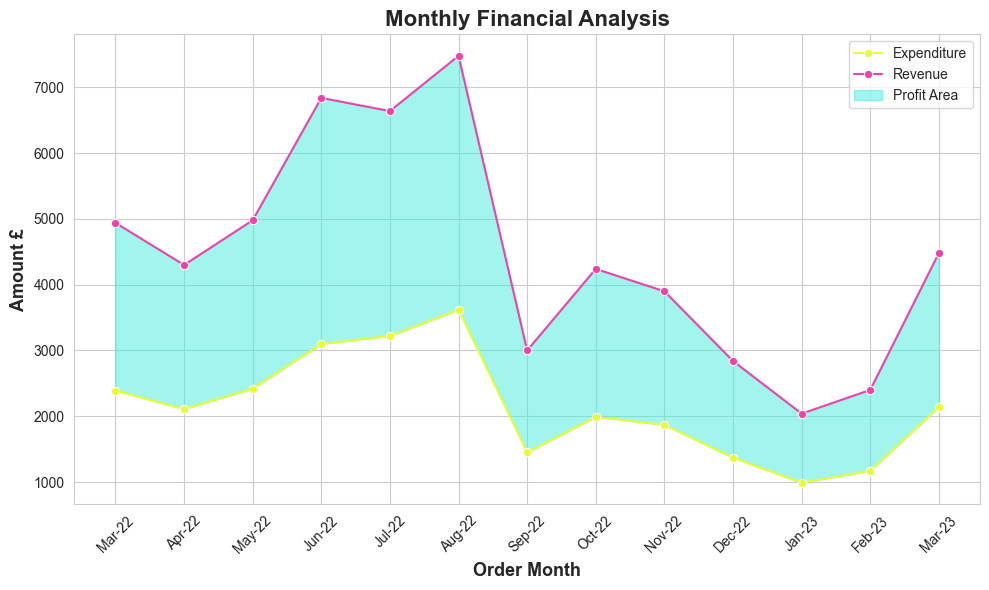

In [6]:
# Seaborn prefers all the code in one cell for some reason

# let's copy this so as to keep it safe first
month_grouped = cost_analysis.copy()

# create 'order_month' column based on 'order_date'
month_grouped['order_month'] = month_grouped['order_date'].dt.to_period('M')

# groupby 'order_month' & aggregate
grouped_by_month = month_grouped.groupby('order_month').agg({
    'expenditure': 'sum',
    'revenue': 'sum',
    'profit': 'sum'
}).reset_index()

# -------------------------------------------------------------------

# let's visualise this
fig, ax = plt.subplots(figsize=(10, 6))

# convert to datetime
grouped_by_month['order_month'] = pd.to_datetime(grouped_by_month['order_month'].astype('datetime64'))

# format the 'order_month' for axis ticks
grouped_by_month['formatted_month'] = grouped_by_month['order_month'].dt.strftime('%b-%y')

# plot line for 'expenditure' & 'revenue' with markers
sns.lineplot(x='formatted_month', y='expenditure', data=grouped_by_month, ax=ax, label='Expenditure', marker='o', color='#E7FE34')
sns.lineplot(x='formatted_month', y='revenue', data=grouped_by_month, ax=ax, label='Revenue', marker='o', color='#ED44A9')

# shade area between 'expenditure' & 'revenue'
ax.fill_between(grouped_by_month['formatted_month'], grouped_by_month['expenditure'], grouped_by_month['revenue'], color='#44EDDD', alpha=0.5, label='Profit Area')

plt.xlabel('Order Month', fontsize=13, fontweight='bold')
plt.ylabel('Amount £', fontsize=13, fontweight='bold')
plt.title('Monthly Financial Analysis', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()

plt.savefig('/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/images/data_visualisations/fig11_potential_monthly_financial_analysis.png')

plt.show()

In [7]:
# calculate the average monthly profit margin as a percentage
grouped_by_month['avg_monthly_profit_margin'] = (grouped_by_month['profit'] / grouped_by_month['revenue']) * 100

# weighted average profit
weighted_yearly_avg_profit_margin = (grouped_by_month['avg_monthly_profit_margin'] * grouped_by_month['revenue']).sum() / grouped_by_month['revenue'].sum()

print(f"Weighted Yearly Average Profit Margin: {weighted_yearly_avg_profit_margin:.2f}%")

Weighted Yearly Average Profit Margin: 52.07%


This could have been the figures for last year in terms of revenue, expenditure & profit using Option 4. With a weighted average monthly profit margin of 52.07%. It would be good to have the accounts for that period to check my theory that the business model I proposed for the Fleet would, in fact, create an increase in profit.

### Let's save the final cost_analysis_march22-march23 dataframe to a .csv should anyone want to conduct further analysis on it:

I would have liked to attribute the 'order_id' & 'customer_id' back to the dataframe first, but I didn't have time.

In [8]:
cost_analysis

,order_date,delivery_region,box_type,box_count,daily_small_trucks_needed,daily_large_trucks_needed,revenue,driver_cost,fuel_cost,expenditure,profit,profit_%,order_week,order_month,order_year,financial_quarter
0,2022-03-01,greater_london,large,1,0,1,100.00,20.00,30.00,50.00,50.00,100.00,9,March,2022,Q1
1,2022-03-01,south_east,small,1,1,0,20.00,5.00,5.00,10.00,10.00,100.00,9,March,2022,Q1
2,2022-03-01,south_wales,small,1,1,0,20.00,5.00,5.00,10.00,10.00,100.00,9,March,2022,Q1
3,2022-03-01,south_west,large,1,0,1,100.00,20.00,30.00,50.00,50.00,100.00,9,March,2022,Q1
4,2022-03-01,south_west,small,1,1,0,20.00,5.00,5.00,10.00,10.00,100.00,9,March,2022,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,2023-03-29,south_east,small,1,1,0,20.00,5.00,5.00,10.00,10.00,100.00,13,March,2023,Q1
1180,2023-03-30,greater_london,small,2,1,0,40.00,5.00,5.00,10.00,30.00,300.00,13,March,2023,Q1
1181,2023-03-30,south_east,large,1,0,1,100.00,20.00,30.00,50.00,50.00,100.00,13,March,2023,Q1
1182,2023-03-31,south_west,small,1,1,0,20.00,5.00,5.00,10.00,10.00,100.00,13,March,2023,Q1


In [9]:
# let's save the cost_analysis_march22-march23 to a .csv

cost_analysis.to_csv('/Users/lottiejanepollare/Library/Mobile Documents/com~apple~CloudDocs/CV, Profiles, Interviews & Job Applications/applications/techmodal_analyst_data_engineer/20230825_Analyst_case_study_submission_Lottie_Jane_Pollard/datasets/cost_analysis_march22-march23.csv', index=False, sep=',')

print(f"The dataframe 'cost_analysis_march22-march23' has been saved for analysis as 'cost_analysis_march22-march23.csv'")

The dataframe 'cost_analysis_march22-march23' has been saved for analysis as 'cost_analysis_march22-march23.csv'


-----------------------

# FINAL PROJECT CONCLUSION

## Optimal Fleet Composition

After conducting a thorough analysis of various operational scenarios, Option 4 emerges as the most balanced & strategically sound choice for Mr. Haulage. By leveraging the strengths of both Options 1 & 3, it offers a unique blend of flexibility & scalability. Under this option, a typical day would require 2-3 small trucks and 1-2 large trucks, which should form the basis of Mr. Haulage's new fleet.

## Contingency Planning

For rare or peak demand days, it's advisable to have a contingency plan that involves hiring additional trucks rather than owning a fleet large enough to cover these outliers. This approach not only reduces the capital & operational expenditure but also adds an element of flexibility to the fleet management. The analysis indicates that peak demand could go up to 6 small trucks and 5 large trucks, this is based on the assumption that small trucks in Greater London can make 3 trips per day, therefore reducing the need for additional small trucks significantly.

## Capital Expenditure Strategy

Staggering the purchase of new trucks throughout the year could be a financially prudent move. This spreads out the capital expenditure and allows Mr. Haulage to better match the acquisition of new assets with actual demand trends & cash flow. Revenue from selling off the old fleet should also be considered. This could offer a substantial offset against the cost of the new purchases, improving the overall financial outlook.

## Financial Implications

The model predicts a weighted yearly average profit margin of 52.07% under Option 4 for the period of March 2022 - March 2023. While promising, it's crucial to validate these projections against actual financial data from Mr. Haulage once they become available. Additionally, a future step could involve using the two years' worth of order data to predict the volume of orders for March 2023 - March 2024, taking seasonality into account. This would give a more comprehensive financial picture.

## Market Research

Finally, before making any purchases, it is imperative to ensure that the prices quoted for small and large trucks are competitive. An extensive market survey could reveal better deals or even the availability of medium-sized trucks, which have not been considered in this analysis but could offer additional operational flexibility.

## Final Word

In conclusion, Option 4 provides a robust framework for Mr. Haulage to not only meet current operational demands but also to scale efficiently in the future. A hybrid approach of owning a base fleet and renting additional trucks for peak days appears to be the most cost-effective & flexible solution. Future financial performance should be closely monitored to refine this operational strategy further.

By following these recommendations, Mr. Haulage can look forward to a more efficient, cost-effective, and scalable operation, ready to meet the challenges and opportunities that lie ahead.

## Cost Breakdown

In [10]:
small_box_revenue = 20
large_box_revenue = 100
small_truck_purchase_cost = 2000
large_truck_purchase_cost = 5000

# Count occurrences of 'small' and 'large' in the 'box_type' column
box_counts = cost_analysis['box_type'].value_counts()
# calculate income
total_yearly_income = (box_counts.get('small', 0) * small_box_revenue) + (box_counts.get('large', 0) * large_box_revenue)

print(f"March 2022 - March 2023 Total yearly income: £{total_yearly_income:,.2f}")
print(f"--------------------------------------------------------")
print(f"Cost of Trucks 3 Small Trucks & 2 Large Trucks £{(3 * small_truck_purchase_cost) + (2 * large_truck_purchase_cost):,.2f}")
print(f"--------------------------------------------------------")
print(f"£{(3 * small_truck_purchase_cost) + (2 * large_truck_purchase_cost):,.2f} is {((3 * small_truck_purchase_cost) + (2 * large_truck_purchase_cost)) / total_yearly_income * 100:,.2f}% of the yearly contract income.")
print(f"--------------------------------------------------------")

March 2022 - March 2023 Total yearly income: £50,800.00
--------------------------------------------------------
Cost of Trucks 3 Small Trucks & 2 Large Trucks £16,000.00
--------------------------------------------------------
£16,000.00 is 31.50% of the yearly contract income.
--------------------------------------------------------


----------------------------------

### Questions for Mr Haulage & his Management Team:

- **Current Fleet:**
    - How many trucks do you currently have of each size?
        - Does this number currently service the contract well?
        - Are there plans for the contract to be scaled up / down?
    - Are the current vehicles owned or leased?
    - What is the potential income / expenditure associated with selling / returning them? Factoring this into the cost analysis would be extremely beneficial
    - Do you have other contracts where the trucks can be utilised when not in use for this specific contract?
    - Did you allow for this capital expenditure when submitting your tender for the contract? If not, when is the contract up for renewal & can you build these costs into your bid
    - Have you conducted thorough market research into trucks on the market? A medium-sized truck hasn't been included & could be beneficial
- **Dataset:**
    - Do you have any further data relating to this Defence contract? Having two full years data (August '21 - August '23) would be useful to perform a year-on-year cost analysis & to feed our future growth prediction model more training data
    - Breaking the delivery_region down further would be beneficial. Further data on exact delivery locations could help to plan your routes more effectively
- **Truck Details:**
    - Why can each type of truck only perform 'one delivery per day'? This seems to be a major factor holding you back from reaching your highest-profit margin. Understanding this & looking into other possibilities such as:
        - Hours per day the driver is able to work and therefore how many deliveries they can perform each day
        - Repeat deliveries for trucks within the drivers shift when the delivery region & distance allows (which is a high percentage of the time given that most of your clients are within Greater London & the strong correlation between volume of orders & shorter delivery distance (miles)
        - You currently pay the driver a day rate & a fuel cost per day - if it takes 1 hour to load one small box & most of your orders (31.45%) are in Greater London, where you are based (average of 26.91 miles) the driver could reload 3 times, or you could pay your driver per box delivered.
    - The truck details provided show a driver cost PER DAY & fuel cost PER DAY & loading time PER TRUCK, however, you haven't provided any information in relation to hours worked per day, so I'm unable to attribute any costs to 'loading time' or gain insights from this. Further information for analysis would be beneficial
- **Defence Contract:**
    - Can you confirm the current SLA & KPI's in regard to turn around time for orders? The Assumption has been based on same-day delivery, however, a 48-72 hour turn-around time would greatly impact the results of my analysis and reduce the number of trucks required to fulfil the contract
    - Is the Defence contract planned to continue?
    - When is the contract up for renewal?
    - How long have you had the contract & what is the likelihood of renewal in the current market?
    - I'd like to clarify that all records in this dataset pertain to the ONE Defence contract in question? There are 1,792 customers in the dataset of 2,000 orders indicating a lack of repeat business, I'd expect to see fewer customer_id's & more repeat orders when analysing one specific contract. I am working on the assumption that the singular aforementioned 'Defence Contract' is made up of many customers, therefore validating many Customer ID's
    - Could you clarify the meaning of item_serial? I have checked as best I can for duplicate data here, but without a further context I can only assume its value & allow duplicates. Considering there are 2,000 orders & 1,982 item serials (only a variation of 18); it strikes me that there is the potential for there to be duplicate records placed by the Defence contractor accidentally, maybe two order_id’s / purchase orders raised for the same delivery that may not have been fulfilled or made it to invoicing



### My own reflections on this data analysis project:

- If I had more time, I'd like to have:
    - Looked at the relationship with the Prophet growth model. Specifically overlayed my business model & weighted monthly profit over the Prophet growth model so show expected figures for the next financial year
    - Significantly reduced the codeblock in the categorising of trucks needed, maybe even had one function taking into account all 4 options
    - Utilised Test-Driven Development to produce the code blocks to reduce the time I manually spent checking .csv outputs in Excel
    - Significantly reduced the code in the pd.merge block & even considered a different approach. An afterthought was to potentially populate columns with conditional logic in a structured way instead of the way I did it.
    - Explore more of the trends in the financial data for Mr. Haulage, but due to time constraints & a full financial report not being in the scope of this assignment I hadn't
    - I would have liked to attribute the ‘order_id’ & ‘customer_id’ back to the cost_analysis dataframe before exporting, but I didn’t have time

- This was my first data analysis project & first take home interview assignment. I worked on the assumption that you wanted to see what we'd do with 'vague' data, so I didn't ask any questions, (instead I made my assumption & exclusions clear in my report), however, Karen emailed on Friday saying I could ask her questions about the case study so now I'm not sure. If it had been more clear when the case study was given to me, I'd probably have asked the questions I have for Mr. Haulage as I went along as I would in the real world (clarify with the client & communicate as often as possible).